# Notebook 2: Comparing Urban &amp; Rural Environmental Data

This week we are going to continue exploring the White House Environmental Justice dataset from last week.

Our main objective for this notebook is to use table manipulation and data visualization to compare environmental data in urban and rural regions.

The first half of this notebook will be a introduction on how to use some important coding tools, and the latter half will be a guided project where you will be actively using those tools to analyze some data!



In [1]:
#Just run this cell!

#Importing packages
import matplotlib
matplotlib.use('Agg')
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

## Manipulating Tables

In this introductory section, we will be using a dataset called `Food_Production.csv` that shows the greenhouse gas emissions (in kg CO2) involved in different stages of production for different foods.

Run the cell below to load the dataset into a table.

In [2]:
#Just run this cell!
food_production = Table.read_table('Food_Production.csv')

**Viewing a Table**

Notice how the cell above does not display a table. Instead, it is just there to assign the variable `food_production` to the new table.

To use a table manipulation method in python, the general approach to calling the method (i.e using the method) is: `tbl.method(parameters)`.

If we want to preview the first few rows of the table, we need to use the method `.show()`. It takes in one parameter, which is the number of rows we want to view.

Below is an example of how we would use `.show()` to view 5 rows in the table `food_production`.

In [3]:
food_production.show(5)

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Wheat & Rye (Bread),0.1,0,0.8,0.2,0.1,0.1,0.1,1.4
Maize (Meal),0.3,0,0.5,0.1,0.1,0.1,0,1.1
Barley (Beer),0,0,0.2,0.1,0,0.5,0.3,1.1
Oatmeal,0,0,1.4,0,0.1,0.1,0,1.6
Rice,0,0,3.6,0.1,0.1,0.1,0.1,4


**Taking columns or rows from a table**

Now that we have some idea of the table we are working with, let's try manipulating this table by extracting columns and rows to create a new table.

First, let's try created a new table with just the column `Food product` and `Total_emissions`. 
To create a new table comprised of certain columns, we need to use the method `.select()`. This method takes in column labels (as strings) or column indices (as integers) that correspond to the columns we want to extract. 

Run the cells below to see both ways of using `.select()`.

In [4]:
#Using .select() with column labels
food_production.select('Food product', 'Total_emissions')

Food product,Total_emissions
Wheat & Rye (Bread),1.4
Maize (Meal),1.1
Barley (Beer),1.1
Oatmeal,1.6
Rice,4
Potatoes,0.3
Cassava,0.9
Cane Sugar,2.6
Beet Sugar,1.4
Other Pulses,1.6


In [5]:
#Using .select() with column indices
#Notice how the first column has index number 0, not 1! The 2nd column has index number 1, and so on.
food_production.select(0, 8)

Food product,Total_emissions
Wheat & Rye (Bread),1.4
Maize (Meal),1.1
Barley (Beer),1.1
Oatmeal,1.6
Rice,4
Potatoes,0.3
Cassava,0.9
Cane Sugar,2.6
Beet Sugar,1.4
Other Pulses,1.6


To create a new table comprised of certain rows, we need to use the method `.take()`. This method take in either a single integer or an array of integers that correspond to the index position/positions of the rows you want to extract.

Run the cells below to see how `.take()` is used.

In [6]:
#Taking the first row of the table
food_production.take(0)

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Wheat & Rye (Bread),0.1,0,0.8,0.2,0.1,0.1,0.1,1.4


In [7]:
#Taking rows at index 1, 3, 5, and 7
#Notice how we are inputting an array into the method this time
row_indices = make_array(1, 3, 5, 7)
food_production.take(row_indices)

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Maize (Meal),0.3,0,0.5,0.1,0.1,0.1,0,1.1
Oatmeal,0,0,1.4,0,0.1,0.1,0,1.6
Potatoes,0,0,0.2,0,0.1,0,0,0.3
Cane Sugar,1.2,0,0.5,0,0.8,0.1,0,2.6


**Removing columns**

The method `.drop()` can be used to create a copy of a table with removed columns. It can take either column labels or indices.

Let's use it to remove the `Processing` and `Packaging` column.

In [8]:
#Remove Processing column
food_production.drop('Processing', 'Packaging')

Food product,Land use change,Animal Feed,Farm,Transport,Retail,Total_emissions
Wheat & Rye (Bread),0.1,0,0.8,0.1,0.1,1.4
Maize (Meal),0.3,0,0.5,0.1,0,1.1
Barley (Beer),0,0,0.2,0,0.3,1.1
Oatmeal,0,0,1.4,0.1,0,1.6
Rice,0,0,3.6,0.1,0.1,4
Potatoes,0,0,0.2,0.1,0,0.3
Cassava,0.6,0,0.2,0.1,0,0.9
Cane Sugar,1.2,0,0.5,0.8,0,2.6
Beet Sugar,0,0,0.5,0.6,0,1.4
Other Pulses,0,0,1.1,0.1,0,1.6


**Extracting a column as an array**

Another very useful method is `.column()`, which takes a column label or column index and outputs that column as an array.

Note: this is not to be confused with `.select()`, which outputs a table instead of an array.

In the example below, we are assigning the variable `transport` to an array of all the values in the column `Transport` (CO2 greenhouse gas emissions released in the transport of 1 kg of that food product). 

Now that we have the values as an array, we can apply array methods onto it. In this case, we use `np.mean()` to find the mean transport emissions across the different products, and then we separately use `.item()` to extract the 5th item of the array.

In [9]:
#Extracting the column as an array
transport = food_production.column('Transport')
transport

array([0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.8, 0.6, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.2, 0.3, 0.2, 0.2, 0.2, 0.5, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1,
       0.3, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.3, 0.4, 0.5, 0.3, 0.3, 0.1,
       0.1, 0.1, 0.1, 0.2])

In [10]:
#Applying np.mean() onto the array
np.mean(transport)

0.1953488372093023

In [11]:
#Extracting the fifth item from the array
transport.item(4)

0.1

**Sorting tables**

If we want to sort a table, we need to use the method `.sort()`. This lets us sort a table by a given column, which is inputted as either a column label or column index. The method also takes in an optional parameter, which is used to indicate whether or not it should be sorted in descending order (by default, this will be set to `True`).

If the column you want to sort by contains numerical values, the table will be sorted in ascending or descending order of those values. If the column contains strings, the table will be sorted in alphabetical or reverse alphabetical order. 

In the examples below, we sort the table by `Total_emissions` in descending order, and then we sort the table in alphabetical order by `Food_product`.

In [12]:
#Sorting by total emissions in descending order
food_production.sort('Total_emissions', descending = True)

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6
Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5
Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2
Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1
Dark Chocolate,14.3,0,3.7,0.2,0.1,0.4,0,18.7
Coffee,3.7,0,10.4,0.6,0.1,1.6,0.1,16.5
Shrimps (farmed),0.2,2.5,8.4,0,0.2,0.3,0.2,11.8
Palm Oil,3.1,0,2.1,1.3,0.2,0.9,0,7.6
Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2
Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1


In [13]:
#Sorting alphabetically by Food product
#Note that for alphabetical order, descending = False and for reverse alphabetical order, descending = True
food_production.sort('Food product', descending = False)

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Apples,0,0,0.2,0,0.1,0,0,0.3
Bananas,0,0,0.3,0.1,0.3,0.1,0,0.8
Barley (Beer),0,0,0.2,0.1,0,0.5,0.3,1.1
Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6
Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1
Beet Sugar,0,0,0.5,0.2,0.6,0.1,0,1.4
Berries & Grapes,0,0,0.7,0,0.2,0.2,0,1.1
Brassicas,0,0,0.3,0,0.1,0,0,0.4
Cane Sugar,1.2,0,0.5,0,0.8,0.1,0,2.6
Cassava,0.6,0,0.2,0,0.1,0,0,0.9


**Filtering tables**

Extracting specific rows in a table based on their value is also very useful in table manipulation. This is done by using the `.where()` method. It takes in two parameters, a column name or index and a predicate. A predicate is some criterion that needs to be met in order for the row to be extracted.

In the example below, we use `.where()` to create a new table containing only rows where the `Animal Feed` emissions are equal to 0, and another new table that contains only `Rice` as a food product. The predicate that we use in this case is `are.equal_to()`.


In [14]:
#Table with only foods where Animal Feed emissions are 0
food_production.where('Animal Feed', are.equal_to(0))

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Wheat & Rye (Bread),0.1,0,0.8,0.2,0.1,0.1,0.1,1.4
Maize (Meal),0.3,0,0.5,0.1,0.1,0.1,0,1.1
Barley (Beer),0,0,0.2,0.1,0,0.5,0.3,1.1
Oatmeal,0,0,1.4,0,0.1,0.1,0,1.6
Rice,0,0,3.6,0.1,0.1,0.1,0.1,4
Potatoes,0,0,0.2,0,0.1,0,0,0.3
Cassava,0.6,0,0.2,0,0.1,0,0,0.9
Cane Sugar,1.2,0,0.5,0,0.8,0.1,0,2.6
Beet Sugar,0,0,0.5,0.2,0.6,0.1,0,1.4
Other Pulses,0,0,1.1,0,0.1,0.4,0,1.6


In [15]:
#Table that contains only Rice
food_production.where('Food product', are.equal_to('Rice'))

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Rice,0,0,3.6,0.1,0.1,0.1,0.1,4


What if we want to use some other criterion? There are many other predicates we can choose from.

Here is a list of predicate examples.
|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

Let's try using one of them to create a table of food products with retail emissions above 0.2.

In [16]:
#Table of food products with retail emissions above 0.2
food_production.where('Retail', are.above(0.2))

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions
Barley (Beer),0,0,0.2,0.1,0,0.5,0.3,1.1
Soymilk,0.2,0,0.1,0.2,0.1,0.1,0.3,1
Tofu,1,0,0.5,0.8,0.2,0.2,0.3,3
Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8
Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2


**Joining two tables**



`.join()` is a method that combines two table by a shared column. This column should contain values that are present in both tables.

The method is structures as follows: `tblA.join(column_label_A, tblB, column_label_B)`, which generates a table that combines tblA and tblB, containing rows for all values of a specified column that appears in both columns. 

_Note: In the case that the column labels for this shared column are different, the unique labels can be specified. If not, the default value for `column_label_B` is `column_label_A`._

In the example below, we combine the tables our `food_production` table with `food_land_use` by the column `Food product`.

In [17]:
#Load and view the new table `food_land_use`.
food_land_use = Table.read_table('food_land_use.csv')
food_land_use.show(5)

Food product,Land use per kilogram (m² per kilogram)
Wheat & Rye (Bread),nan
Maize (Meal),nan
Barley (Beer),nan
Oatmeal,7.6
Rice,2.8


In [18]:
#Combine food_production and food_land_use by the shared 'Food product' column
combined_tbl = food_production.join('Food product', food_land_use)
combined_tbl

Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Land use per kilogram (m² per kilogram)
Apples,0,0,0.2,0,0.1,0,0,0.3,0.63
Bananas,0,0,0.3,0.1,0.3,0.1,0,0.8,1.93
Barley (Beer),0,0,0.2,0.1,0,0.5,0.3,1.1,nan
Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,326.21
Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,43.24
Beet Sugar,0,0,0.5,0.2,0.6,0.1,0,1.4,1.83
Berries & Grapes,0,0,0.7,0,0.2,0.2,0,1.1,2.41
Brassicas,0,0,0.3,0,0.1,0,0,0.4,0.55
Cane Sugar,1.2,0,0.5,0,0.8,0.1,0,2.6,2.04
Cassava,0.6,0,0.2,0,0.1,0,0,0.9,1.81


Those are all of the table manipulation methods that you will need for this notebook! However, there are many more things you can do with tables. The complete documentation for table manipulation in the `datascience` package can be found [here](http://data8.org/datascience/tables.html).

## Data Visualization

In data science, it is also very useful to visualize our data. In this notebook, we will be introducing scatter plots and bar charts.

**Scatter plots**

Scatter plots are used to observe some relationship between two continuous variables. We can generate scatter plots by using `.scatter()` on a table. It takes in two parameters, the column labels that correspond to the x-axis and y-axis respectively.

Let's use it to visualize the relationship between land use and total emissions of food products.

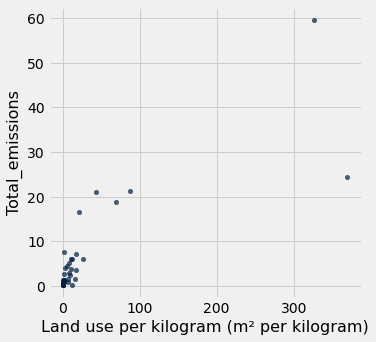

In [19]:
combined_tbl.scatter('Land use per kilogram (m² per kilogram)', 'Total_emissions')

**Bar charts**

Bar charts are used to compare a numerical property of classified groups. The method `.bar()` or `.barh()` (horizontal bar chart) takes in two parameters: the categorical column label and then the numerical column label.

In the example below, we use it to see the total emissions (numerical property) for each food product (category).

/shared-libs/python3.7/py/lib/python3.7/site-packages/datascience/tables.py:3006: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


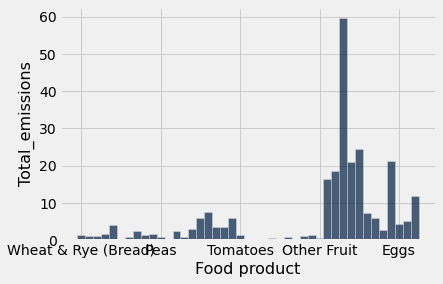

In [20]:
#Standard bar chart
food_production.bar('Food product', 'Total_emissions')

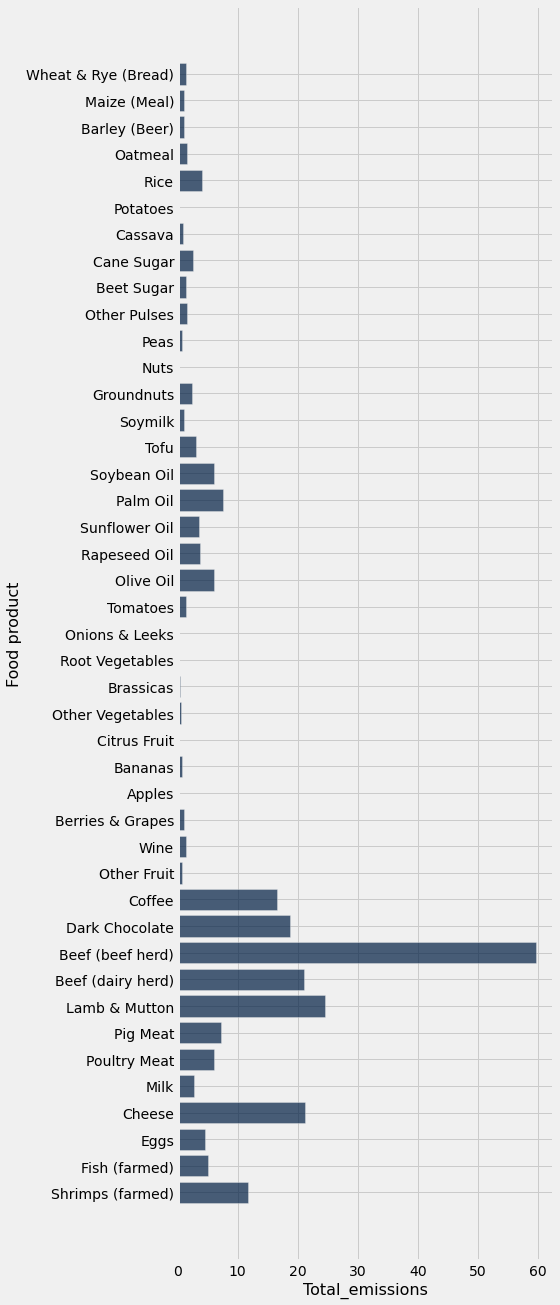

In [21]:
#Horizontal bar chart
food_production.barh('Food product', 'Total_emissions')

That's the end of this introduction! The rest of this notebook will be an interactive project for you to practice some of the skills you've learnt!

## Part 1: California Counties

Now it's your turn! In these next few parts, you will be applying tools from the previous two sections to analyze data from the WHEJ dataset.

First, run the cell below to take a look at our `california` table. Each row of the table corresponds to a county in California and some demographic and environmental data.

In [22]:
#Just run this cell
california = Table.read_table("/work/Notebook 2/California_WHEJ.csv")
california.show(3)

Unnamed: 0,GEOID10,Housing burden (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Current lack of health insurance among adults aged 18-64 years,Diagnosed diabetes among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Particulate matter (PM2.5),Ozone,Traffic proximity and volume,Proximity to RMP sites,Proximity to TSDF sites,Proximity to NPL sites,Wastewater discharge,Percent pre-1960s housing (lead paint indicator),Individuals under 5 years old,Individuals over 64 years old,Linguistic isolation (percent),Percent of households in linguistic isolation,Poverty (Less than 200% of federal poverty line),Percent individuals age 25 or over with less than high school degree,Unemployed civilians (percent),Housing + Transportation Costs % Income for the Regional Typical Household,Score A,Score B,Socioeconomic Factors,Sensitive populations,Environmental effects,Exposures,Pollution Burden,Population Characteristics,Score C,Score D,Score E,"Low AMI, Low HS graduation",Meets socioeconomic criteria,Meets burden criteria,Score F (communities),OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,D_PM25_2,D_OZONE_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_LDPNT_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_PWDIS_2,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area,FIPS code,State Abr.,County name,CBSA title,CBSA 2012 pop,County 2012 pop,2013 code,2006 code,1990-based code
10297,60014001001,0.1433,2991,2.92232,7.9,5.1,8.5,4.8,8,9,26.4966,0.437041,0.597205,8.27278,29.3125,1128,0.175204,2.29209,0.118582,0,0.176558,0.0618522,0.254096,0.0116009,0.0366826,0.0959088,0.0178275,0.05,76,0.115592,0.0133433,0.485942,0.669558,0.480974,0.48832,0.485871,0.57775,0.280712,0.0559111,0.297226,False,False,False,False,10298,60014001001,California,CA,9,2991,-3824.22,-13550.2,-276.067,-12248.5,-202.029,-521436,-81.6166,-54.8162,-80.9909,-1059.55,-0,8.27278,29.3125,0.597205,26.4966,0.437041,1128,0.176558,0.118582,0.175204,2.29209,0,0.201916,0.129048,0.307924,0.0959088,0.0366826,0.0178275,0.0618522,0.254096,18116.6,1.10812e+07,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
10298,60014002001,0.06875,1102,3.15678,8,4,6.9,4.8,6.1,7.6,28.282,0.47766,0.784154,8.3093,28.5145,5492.56,0.236346,5.42626,0.152012,0,0.957014,0.0816697,0.1951,0,0,0.0789474,0.0309406,0.0360825,55,0.135196,0.0164389,0.309663,0.57654,0.6582,0.56422,0.595547,0.443102,0.263888,0.0391941,0.196257,False,False,True,False,10299,60014002001,California,CA,9,1102,-1552.41,-5327.32,-146.502,-5283.87,-89.2403,-1.02616e+06,-178.797,-28.4,-44.1561,-1013.78,-0,8.3093,28.5145,0.784154,28.282,0.47766,5492.56,0.957014,0.152012,0.236346,5.42626,0,0.186933,0.113596,0.294918,0.0789474,0,0.0309406,0.0816697,0.1951,3775.32,464222,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
10299,60014002002,0.06875,895,2.161,8,4,6.9,4.8,6.1,7.6,28.282,0.47766,0.784154,8.3093,28.5145,10897.3,0.239507,5.93015,0.161547,0,0.871921,0.00446927,0.194413,0,0,0.163861,0.00921053,0.0248447,54,0.155107,0.0173134,0.288754,0.349317,0.655383,0.567425,0.596744,0.319035,0.190383,0.0495832,0.181428,False,False,True,False,10300,60014002002,California,CA,9,895,-1011.34,-3470.55,-95.4405,-3442.24,-58.1367,-1.32632e+06,-106.123,-19.6621,-29.1507,-721.767,-0,8.3093,28.5145,0.784154,28.282,0.47766,10897.3,0.871921,0.161547,0.239507,5.93015,0,0.220478,0.108175,0.277095,0.163861,0,0.00921053,0.00446927,0.194413,4019.01,479487,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1


**Question 1.** Create an array called `labels` that contains all the column labels of `california` and a variable called `num_columns` that is an integer of the number of columns.

In [23]:
"""
labels = ...
num_columns = ...
num_columns
"""
labels = california.column_labels
num_columns = len(labels)
num_columns

/shared-libs/python3.7/py/lib/python3.7/site-packages/datascience/tables.py:310: FutureWarning: column_labels is deprecated; use labels
  warnings.warn("column_labels is deprecated; use labels", FutureWarning)


92

**Question 2.** As we can see from the value of `num_columns`, there are a lot of columns in the table but we are only interested in a few of them. Create a new table `cali_environment` that contains only the columns with the labels given in `desired_columns`.

In [24]:
desired_columns = make_array("County name", "County 2012 pop", "2013 code", "Median household income (% of state median household income)", "Poverty (Less than 200% of federal poverty line)", "Air toxics cancer risk", "Respiratory hazard index", "Diesel particulate matter", "Traffic proximity and volume")
"""
cali_environment = ...
cali_environment.show(3)
"""
cali_environment = california.select(desired_columns)
cali_environment.show(3)

County name,County 2012 pop,2013 code,Median household income (% of state median household income),Poverty (Less than 200% of federal poverty line),Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Traffic proximity and volume
Alameda County,1554720,1,2.92232,0.0959088,26.4966,0.437041,0.597205,1128
Alameda County,1554720,1,3.15678,0.0789474,28.282,0.47766,0.784154,5492.56
Alameda County,1554720,1,2.161,0.163861,28.282,0.47766,0.784154,10897.3


**Question 3.** Find the county with the highest 2012 population and assign the <u>string</u> to the variable `highest_pop`.

*Hint: You may need to use the method `.sort()`.*

In [25]:
"""
sorted_population = ...
highest_pop = ...
highest_pop
"""
sorted_population = cali_environment.sort('County 2012 pop', descending = True)
highest_pop = sorted_population.column('County name').item(0)
highest_pop

'Los Angeles County'

**Question 4.** Let's do the same thing to find the county with the lowest 2012 population. Store the name into the variable `lowest_pop`.

In [26]:
"""
resorted_population = ...
lowest_pop = ...
lowest_pop
"""
resorted_population = cali_environment.sort('County 2012 pop', descending = False)
lowest_pop = resorted_population.column('County name').item(0)
lowest_pop

'Alpine County'

Now let's try to compare the environmental data between these two counties.

**Question 5.** Create a new table called `two_counties` that contains two rows from `cali_environment` corresponding to the counties you found in Question 3 and 4.

In [27]:
#Do not change the line below.
#It returns 'True' if the input value is equal to the names of the counties from Q3 and 4.
#You do not need to understand how this line works in this course.

condition = lambda x: True if (x == highest_pop or x == lowest_pop) else False
"""
two_counties = cali_environment.where(..., condition)
two_counties
"""
two_counties = cali_environment.where('County name', condition)

#Only need line below because repeated county names, delete after cleaning
two_counties = two_counties.sort('County 2012 pop').take(make_array(0, 6416))

two_counties

County name,County 2012 pop,2013 code,Median household income (% of state median household income),Poverty (Less than 200% of federal poverty line),Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Traffic proximity and volume
Alpine County,1129,6,0.923772,0.232092,16.4923,0.233401,0.0188699,4.66669
Los Angeles County,9962789,1,-8861.12,0,33.8991,0.48044,0.243724,366.728


**Question 6.** Using the `two_counties` table, create a bar chart that compares the respiratory hazard index between the two counties.

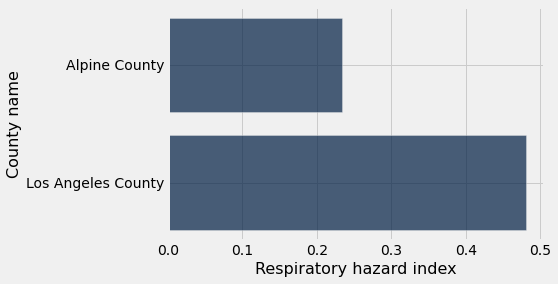

In [28]:
"""
two_counties_respiratory = ...
two_counties_respiratory.barh(..., ...)
"""

two_counties_respiratory = two_counties.select('County name', 'Respiratory hazard index')
two_counties_respiratory.barh('County name','Respiratory hazard index')

**Question 7.** What could be a possible explanation for this difference?

*Type your answer here.*

## Part 2: Urban and Rural Counties

Now that we have compared an environmental condition between two counties, let's try comparing an environmental condition between urban and rural counties.

**Question 1.** Create a histogram that shows the distribution of diesel particulate matter across counties in California.

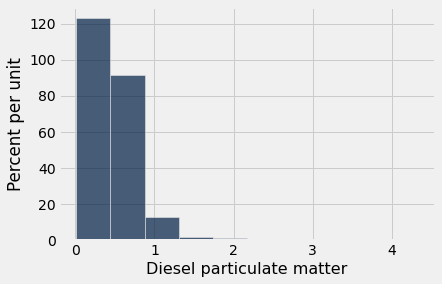

In [29]:
"""
diesel_histogram = ...
diesel_histogram
"""
diesel_histogram = cali_environment.hist('Diesel particulate matter')
diesel_histogram

Next we need to classify counties as either urban or rural. The table below shows the corresponding classifications for each value in the column `2013 code` of `cali_environment`.

In [30]:
#Just run this cell.
code_to_classification = Table().with_columns({'2013 code': [1,2,3,4,5,6], 'Classification': ["Urban", "Suburban", "Suburban", "Rural", "Rural", "Rural"]})
code_to_classification

2013 code,Classification
1,Urban
2,Suburban
3,Suburban
4,Rural
5,Rural
6,Rural


**Question 2.** Create a new table called `classified` that contains a new column labelled `Classification` that contains corresponding urban/rural classification from the `2013 code` column. Make sure to remove the `2013 code` column from the new `classified` table.

*Hint: You may want to use the `.join()` method.*

In [31]:
"""
classified = cali_environment.join('2013 code', code_to_classification).drop('2013 code')
classified.show(3)
"""
classified = cali_environment.join('2013 code', code_to_classification).drop('2013 code')
classified.show(3)

#Delete after cleaning
classified = classified.group('County name', lambda x: x.item(0))

County name,County 2012 pop,Median household income (% of state median household income),Poverty (Less than 200% of federal poverty line),Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Traffic proximity and volume,Classification
Alameda County,1554720,2.92232,0.0959088,26.4966,0.437041,0.597205,1128,Urban
Alameda County,1554720,3.15678,0.0789474,28.282,0.47766,0.784154,5492.56,Urban
Alameda County,1554720,2.161,0.163861,28.282,0.47766,0.784154,10897.3,Urban


**Question 3.** Create a bar chart that compares the diesel particulate matter in urban/rural regions.

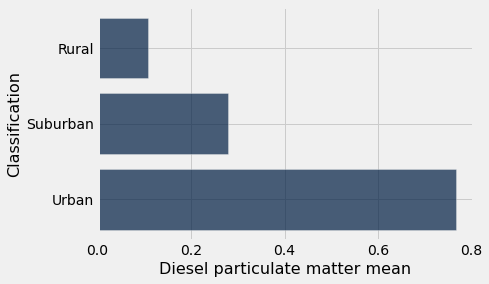

In [32]:
"""
grouped_by_classification = ...
diesel_bar = ...
diesel_bar
"""
grouped_by_classification = classified.group("Classification", np.mean)
diesel_bar = grouped_by_classification.barh("Classification", "Diesel particulate matter mean")
diesel_bar

The widget below generates a bar chart that compares different environmental factors in urban/rural regions.

In [33]:
#only for Deepnote
!pip install ipywidgets

     |████████████████████████████████| 121 kB 19.3 MB/s 
     |████████████████████████████████| 243 kB 37.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<function __main__.select_bar(feature)>

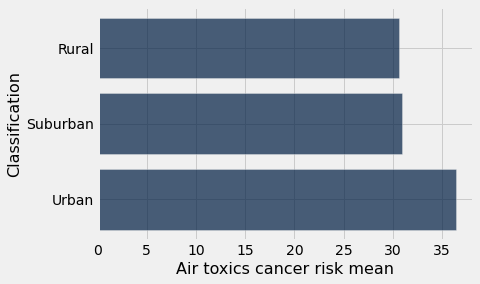

In [40]:
#Just run this cell
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def select_bar(feature):
    return grouped_by_classification.barh("Classification", feature)

interact(select_bar, feature = ["Air toxics cancer risk mean", "Respiratory hazard index mean", "Diesel particulate matter mean", "Traffic proximity and volume mean"])

**Question 4.** Based on the results from the widget above, which factor changes the most between urban/rural areas? Assign your answer as a string to the variable `q4`.

In [35]:
"""
q4 = '...'
"""

#need to determine answer later

"\nq4 = '...'\n"

## Part 3: A Primer on Classifiers

In this next part, we are going to start thinking about how we could predict whether a region is considered urban or rural based on environmental features.

We are going to simplify our classifications into just 'urban' and 'rural'.

In [36]:
#Just run this cell.
new_codes = Table().with_columns({'2013 code': [1,2,3,4,5,6], 'Classification': ["Urban", "Urban", "Urban", "Rural", "Rural", "Rural"]})
new_classification = cali_environment.join('2013 code', code_to_classification).drop('2013 code')
new_classification.show(3)

#delete later
new_classification = new_classification.group('County name', lambda x: x.item(0))

County name,County 2012 pop,Median household income (% of state median household income),Poverty (Less than 200% of federal poverty line),Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Traffic proximity and volume,Classification
Alameda County,1554720,2.92232,0.0959088,26.4966,0.437041,0.597205,1128,Urban
Alameda County,1554720,3.15678,0.0789474,28.282,0.47766,0.784154,5492.56,Urban
Alameda County,1554720,2.161,0.163861,28.282,0.47766,0.784154,10897.3,Urban


**Question 1.** Build a scatter plot with 'Air toxics cancer risk' on the x-axis and 'Respiratory hazard index' on the y-axis.

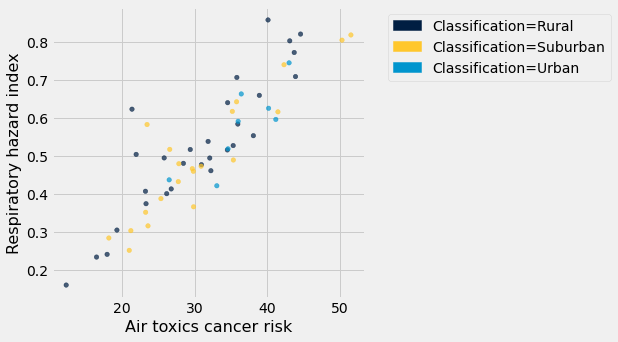

In [37]:
"""
new_classification.scatter(x = ..., y = ..., group = 'Classification')
"""
new_classification.scatter("Air toxics cancer risk", "Respiratory hazard index", group = 'Classification')

The () dots correspond with urban areas, and the () dots correspond with rural areas. We can see that there are clear groupings of the different classifications.

**Question 2.** Based on the scatter plot in Question 1, which of the following coordinates would you expect to be classified as urban? 

1. (x,y)
2. (x,y)
3. (x,y)

Store your answer as an array of integers corresponding to your selection.

In [38]:
"""
q3_2 = make_array(...)
"""

'\nq3_2 = make_array(...)\n'

A k-nearest neighbor classifier predicts the classification of a point based on the classification it its nearest points. These predictions can be tested for accuracy.

**Question 3.** Comparing the scatter plots below, which combination of variables do you think would build a more accurate classifier?

Assign the integer value of your answer in the given variable.

(Upload images)

In [39]:
"""
q3_3 = ...
"""

'\nq3_3 = ...\n'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2717432d-cb20-4851-9142-2356f9ef0a5b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>